In [2]:
!git clone https://github.com/narcissemamboundou/FaceDetection.git

Cloning into 'FaceDetection'...
remote: Enumerating objects: 44, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 44 (delta 16), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (44/44), done.


In [3]:
cd /content/FaceDetection/code

/content/FaceDetection/code


In [4]:
!ls

FaceDectionAlgo.py  FaceRecongnition.py  train.py
FaceDetection.py    test_detection.py


In [5]:
!git status

On branch master
Your branch is up to date with 'origin/master'.

nothing to commit, working tree clean


# Face Recongnition : Introduction

Fascial recognition is a challenge related to the authentication of people through their photos. We use computer vision to carry out this task which seems completely simple for humans but not for computers. 
We are going to use Machine Learning and Deep Learning methods capable of exploiting a large number of faces. The aim is to enable the computer to learn how to detect key features of faces in order to be able to authenticate a person.
In this article, we will see how Deep Learning will help us to detect and recognise faces, detect specific characteristics and authenticate a person.

# What process does your company use to recognise and identify a face? 
The fascial recognition and Face ID authentication essentially goes through 4 main steps.
1.	Face detection: It is indeed essential for the computer to be able to locate one or more faces on a photo or video.
2.	Face Alignment: Identification of the geometric structure of the detected face(s) and conversion to digital through normalisation, translation and rotation operations.
3.	Feature Extraction: Extraction of the features of the face that will be used to perform the authentication operation.
4.	Face Recongnition: Comparison of the extracted data with the known data in the database to validate or invalidate the authentication.

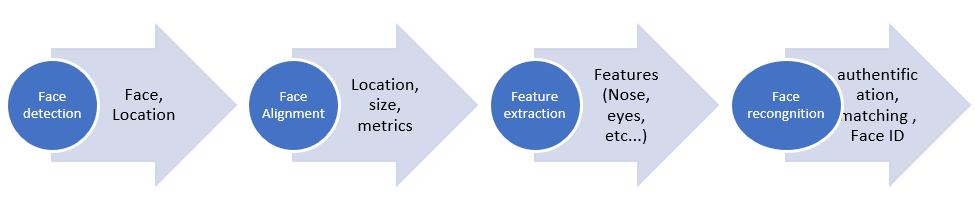

In this part, we will detect the faces of the football players of the Juventus of Turin and Real de Madrid teams. The objective is simply to show you how one or more faces can be detected with OpenCV.

# Face detection with OpenCV 

In this part, we will detect the faces of the football players of the Juventus of Turin and Real de Madrid teams. The objective is simply to show you how one or more faces can be detected with OpenCV.

In [6]:
#Importation 
import cv2 
from google.colab.patches import cv2_imshow

In [7]:
# verify opoenCV the version  
print(cv2.__version__)

# links Google Drive 
#the pre-trained model
haarcascade="/content/drive/MyDrive/FaceDetection/haarcascade_frontalface_default.xml"

# all images
image_cr7= "/content/drive/MyDrive/FaceDetection/images/cr7.jpg"
image_real_team="/content/drive/MyDrive/FaceDetection/images/real_time.jpg"
image_juventus_team="/content/drive/MyDrive/FaceDetection/images/juventus-team.jpg"

4.1.2


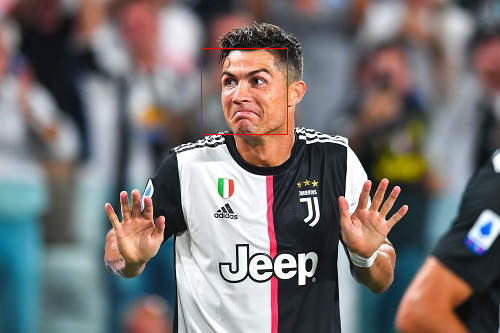

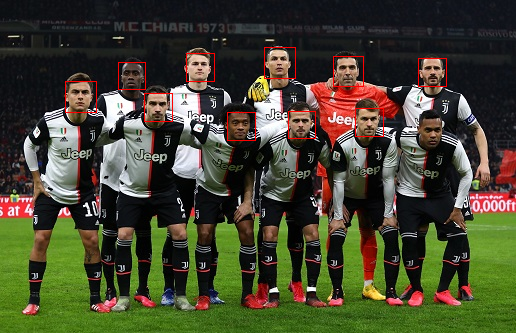

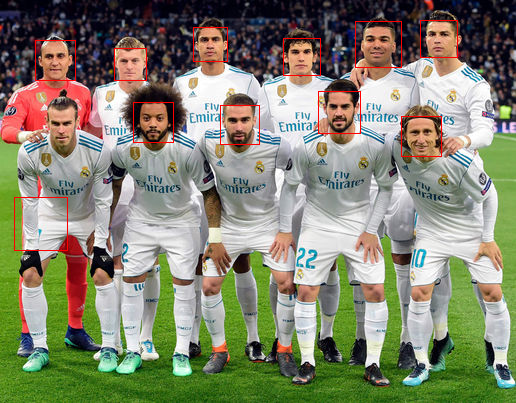

In [8]:
#Images Pixels
img_cr7=cv2.imread(image_cr7)
img_real_teame=cv2.imread(image_real_team)
img_juventus_teame=cv2.imread(image_juventus_team)

#pre-trained model
Haar_classifier_face=cv2.CascadeClassifier(haarcascade)

#Fonction witch detect faces 
def detect_face(image): 

  img=image.copy()

  #Haar_classifier_eyes=cv2.CascadeClassifier(haarcascade_eyes)
  face_detected_rect=Haar_classifier_face.detectMultiScale(img, minNeighbors = 5)

  for rect in face_detected_rect:
    # extract 
    x, y, width, height = rect
    x2, y2 = x + width, y + height
    #draw rectangle 
    cv2.rectangle(img, (x, y), (x2, y2), (0,0,255), 1)
  return(img)


#CR7 Face Detection
cv2_imshow(detect_face(img_cr7))

#Juventus Team Face Detection
cv2_imshow(detect_face(img_juventus_teame))

#RealMadrid Face Detection
cv2_imshow(detect_face(img_real_teame))

# Face detection with Deep Leaning 

In [9]:
!pip install mtcnn

     |████████████████████████████████| 2.3MB 13.5MB/s 


In [10]:
from mtcnn.mtcnn import MTCNN
from matplotlib import pyplot
from google.colab.patches import cv2_imshow
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle

In [11]:

# links Google Drive 
#the pre-trained model
haarcascade="/content/drive/MyDrive/FaceDetection/haarcascade_frontalface_default.xml"

# all images
image_cr7= "/content/drive/MyDrive/FaceDetection/images/cr7.jpg"
image_real_team="/content/drive/MyDrive/FaceDetection/images/real_time.jpg"
image_juventus_team="/content/drive/MyDrive/FaceDetection/images/juventus-team.jpg"

In [12]:
#Function that detects the face of the players using the MTCNN model.
def detect_img(image):
  #Load image 
  img= pyplot.imread(image)
  #Instance the model MTCNN to detect faces
  mtcnn_model=MTCNN()
  #using detect face of MTCNN methode
  faces=mtcnn_model.detect_faces(img)
  ax = pyplot.gca()
  for face in faces: 
    #get features all faces coordonate
    x, y, width, height=face['box']
    #the shap
    rect = Rectangle((x, y), width, height, fill=False, color='red')
    #draw the box
    ax.add_patch(rect)
  #return image
  return(img)


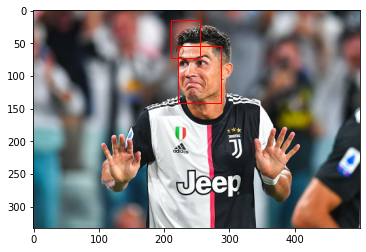

In [13]:
#CR7 Face Detection
pyplot.imshow(detect_img(image_cr7))

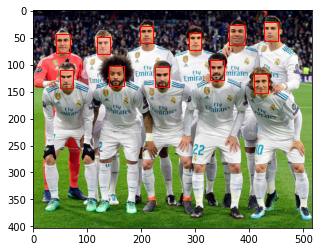

In [14]:
#RealMadrid Face Detection
pyplot.imshow(detect_img(image_real_team))

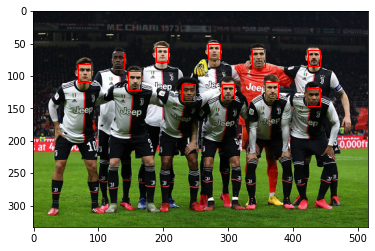

In [15]:
#Juventus Face Detection
pyplot.imshow(detect_img(image_juventus_team))

In [16]:
#With the keys points 
#Function that detects the face of the players using the MTCNN model.
def detect_img(image):
  #Load image 
  img= pyplot.imread(image)
  #Instance the model MTCNN to detect faces
  mtcnn_model=MTCNN()
  #using detect face of MTCNN methode
  faces=mtcnn_model.detect_faces(img)
  ax = pyplot.gca()
  for face in faces: 
    #get features all faces coordonate
    x, y, width, height=face['box']
    #the shap
    rect = Rectangle((x, y), width, height, fill=False, color='red')
    #draw the box
    ax.add_patch(rect)
    for _, value in face['keypoints'].items():
			# create and draw dot
      point = Circle(value, radius=1, color='red')
      ax.add_patch(point)
  #return image
  return(img)


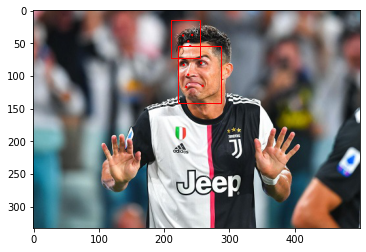

In [17]:
#CR7 Face Detection
pyplot.imshow(detect_img(image_cr7))

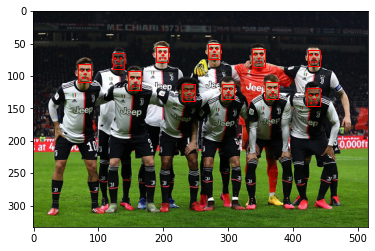

In [18]:
#Juventus Face Detection
pyplot.imshow(detect_img(image_juventus_team))

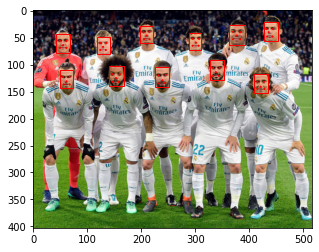

In [19]:
#RealMadrid Face Detection
pyplot.imshow(detect_img(image_real_team))

#Face Recongnition : Which player(s) appear in both teams?

In this part we will compare the images with each other to find the players or the player who appears in both selections. 

We will first start by displaying the lists of players of the two teams well set up an authentication system. 

In [20]:
from mtcnn.mtcnn import MTCNN
from matplotlib import pyplot
from google.colab.patches import cv2_imshow
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from PIL import Image
import numpy as np
from scipy.spatial.distance import cosine
from keras.applications.imagenet_utils import decode_predictions

In [21]:
!pip install -q keras
!pip install -q keras_applications
!pip install -q keras_vggface
import keras 
import keras
import keras_applications 

     |████████████████████████████████| 51kB 7.1MB/s 


In [32]:
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input

In [23]:
#With the keys points 
#Function that detects the face of the players using the MTCNN model.
def Extract_Faces_List(image, required_size=(224, 224)):
  #Load image 
  img= pyplot.imread(image)
  #Instance the model MTCNN to detect faces
  mtcnn_model=MTCNN()
  #using detect face of MTCNN methode
  faces=mtcnn_model.detect_faces(img)
  face_list=[]
  for face in faces: 
    #get features all faces coordonate
    x1, y1, width, height=face['box']
    x1,y1=abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    extacted=img[y1:y2, x1:x2]
    face_extacted=Image.fromarray(extacted)
    face_extacted=face_extacted.resize(required_size)
    face_extacted=np.asarray(face_extacted)
    face_list.append(face_extacted)
  #return faces list
  return(face_list)


def Display_Faces(face_list):
  pyplot.subplots(nrows=4, ncols=1)
  for i in range(len(face_list)):
    pyplot.subplot(1, len(face_list), i+1)
    pyplot.axis("off")
    pyplot.imshow(face_list[i])
    

On affiche les  équipes pour pouvoir identifier les joueurs qui apparaissent dans les deux équipes.

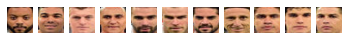

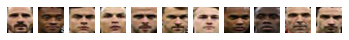

In [40]:
face_list_real=Extract_Faces_List(image_real_team)
face_list_juve=Extract_Faces_List(image_juventus_team)

Display_Faces(face_list_real)
Display_Faces(face_list_juve)

In [137]:
#extracts the properties that make it possible to recognise a face 
def extract_feature(equipe):
  data=np.asarray(equipe, 'float32')
  processed_data=preprocess_input(data)
  model = VGGFace(model='resnet50', include_top=False, input_shape=(224, 224, 3), pooling='avg')
  predictions = model.predict(processed_data)
  return(predictions)

#determine if a player face is a match for a another player face
#If it's the same player 
def face_Match(feat1,feat2):
  return( True if cosine(feat1,feat2)<=0.4 else False)

#Find the  players couple  that appear in both teams 
#returns the faces of the pairs of players with the team to which it is attached 
def couple_identique_face(team1,team2):
  couples=[]
  faces_team1=Extract_Faces_List(team1)
  faces_team2=Extract_Faces_List(team2)
  features_team1=extract_feature(faces_team1)
  features_team2=extract_feature(faces_team2)

  for i in range(0, len(features_team1)):
    for j in range(0, len(features_team2)):
      if face_Match(features_team1[i], features_team2[j]):
        couples.append((faces_team1[i],faces_team2[j], "Player Team 1", "Player Team 2" ))
      else: 
        pass
  return (couples)


#afiche les joueurs qui apparairaissent dans les deux équipes 
def display_Match(couples):
  pyplot.subplots(nrows=len(couples), ncols=len(couples)*2)
  pyplot.title("couple of players who appeared in both teams")
  for i in range(len(couples)):
    pyplot.subplot(1,len(couples)+1,i+1)
    pyplot.xlabel(couples[i][2])
    pyplot.imshow(couples[i][0])
    pyplot.subplot(1,len(couples)+1,i+2)
    pyplot.xlabel(couples[i][3])
    pyplot.imshow(couples[i][1])



In [131]:
couples=couple_identique_face(image_juventus_team, image_real_team)

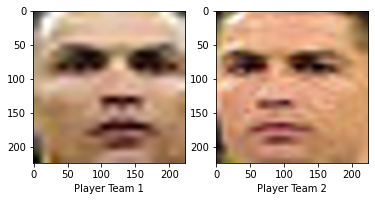

In [138]:
display_Match(couples)

##Conclusion :
In conclusion: There is one player who appears in both teams. Indeed this player is Cristiano Ronaldo. He played for Real Madrid from 2009 to 2018 and for Juventus from 2018 to today. 
## NB
It is important to note that there is at least 2 years difference between the two photos. Our algorithm succeeded in finding Cristiano despite the apparent difference of the player in the two pictures.